In [2]:
import torch
from torch import nn

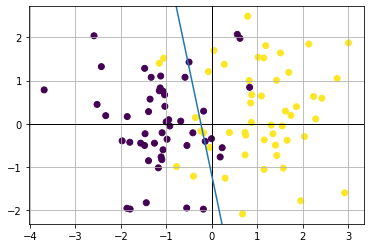

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

np.random.seed(46)
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)


def plotmodel(w1, w2, b):
    
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y)
    
    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()

    x = np.linspace(-2, 4, 50)
    y = (-w1 * x - b)/ w2

    plt.axvline(0, -1, 1, color = "k", linewidth = 1)
    plt.axhline(0, -2, 4, color = "k", linewidth = 1)
    plt.plot(x, y)
    plt.grid(True)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
w1 = 5
w2 = 1
b = 1.2
plotmodel(w1, w2, b)

In [20]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

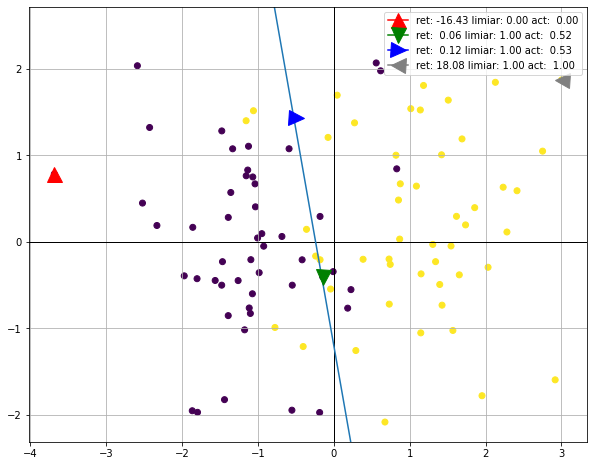

In [21]:
markers = ["^", "v", ">", "<"]
colors = ["r", "g", "b", "gray"]

plt.figure(figsize = (10, 8))
plotmodel(w1, w2, b)

for k, idx in enumerate([17, 21, 43, 66]):
    x = torch.Tensor(X[idx])
    
    ret = perceptron(x)
    act = sigmoide(ret)
    
    act_limiar = 0 if ret.data < 0 else 1
    
    label = "ret: {:5.2f}".format(ret.data.numpy()[0]) + " limiar: {:4.2f}".format(act_limiar) + " act: {:5.2f}".format(act.data.numpy()[0])
    
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=15, label=label)
    
plt.legend()
plt.show()